In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
# loading the data 

In [3]:
data = pd.read_csv(r"C:\Users\sohan\OneDrive\Documents\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#  Count missing values

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Remove CutomerID column

In [9]:
data = data.drop(columns=['CustomerID'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
# Handling Outliers

In [12]:
# Calculate the IQR for each numeric feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis='columns')

# Remove outliers from the dataset
data = data[~outliers]

# Show dimensions of the cleaned data
print("Cleaned data shape:", data.shape)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Gender' column
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Display the updated dataset
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


In [14]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X = scaler.fit_transform(data)

C:\Users\sohan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sohan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sohan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sohan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

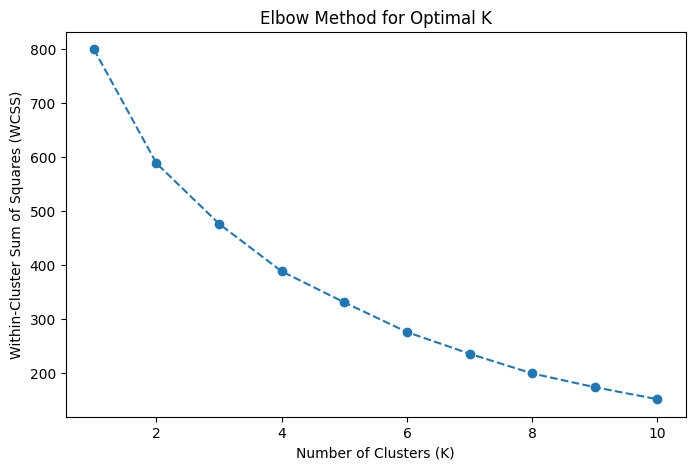

In [15]:
# Initialize an empty list to store the inertia (WCSS) values for different K
wcss = []

# Determine the optimal number of clusters using the elbow method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\sohan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


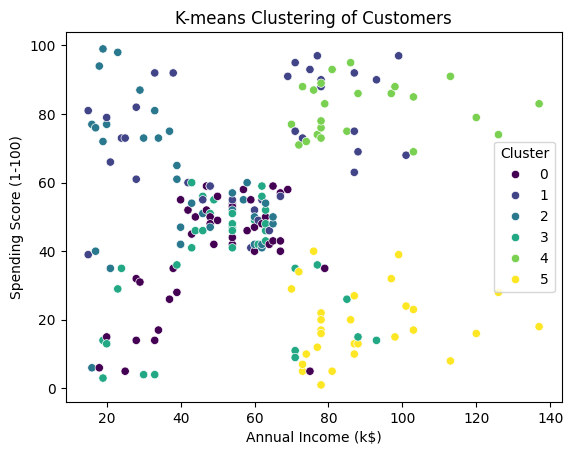

Cluster Centers:
         Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  0.000000e+00  50.609756           49.658537               40.146341
1  1.000000e+00  28.105263           58.342105               71.315789
2  1.665335e-16  26.000000           39.529412               59.500000
3  1.000000e+00  55.628571           52.828571               36.200000
4  8.695652e-02  32.086957           90.000000               81.391304
5  4.482759e-01  36.482759           89.517241               18.000000
Silhouette Score: 0.33107393337175933

Conclusion:
The K-means clustering algorithm has successfully grouped the customers into 6 clusters.
Each cluster represents a distinct segment of customers based on their annual income and spending score.
These clusters can be used for targeted marketing strategies to tailor products and services to specific customer segments.


In [17]:
# Based on the elbow method, let's choose K=5
k = 6

# Train the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the clusters
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of Customers')
plt.show()

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
print("Cluster Centers:")
print(cluster_centers_df)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Conclusion
print("\nConclusion:")
print("The K-means clustering algorithm has successfully grouped the customers into", k, "clusters.")
print("Each cluster represents a distinct segment of customers based on their annual income and spending score.")
print("These clusters can be used for targeted marketing strategies to tailor products and services to specific customer segments.")
